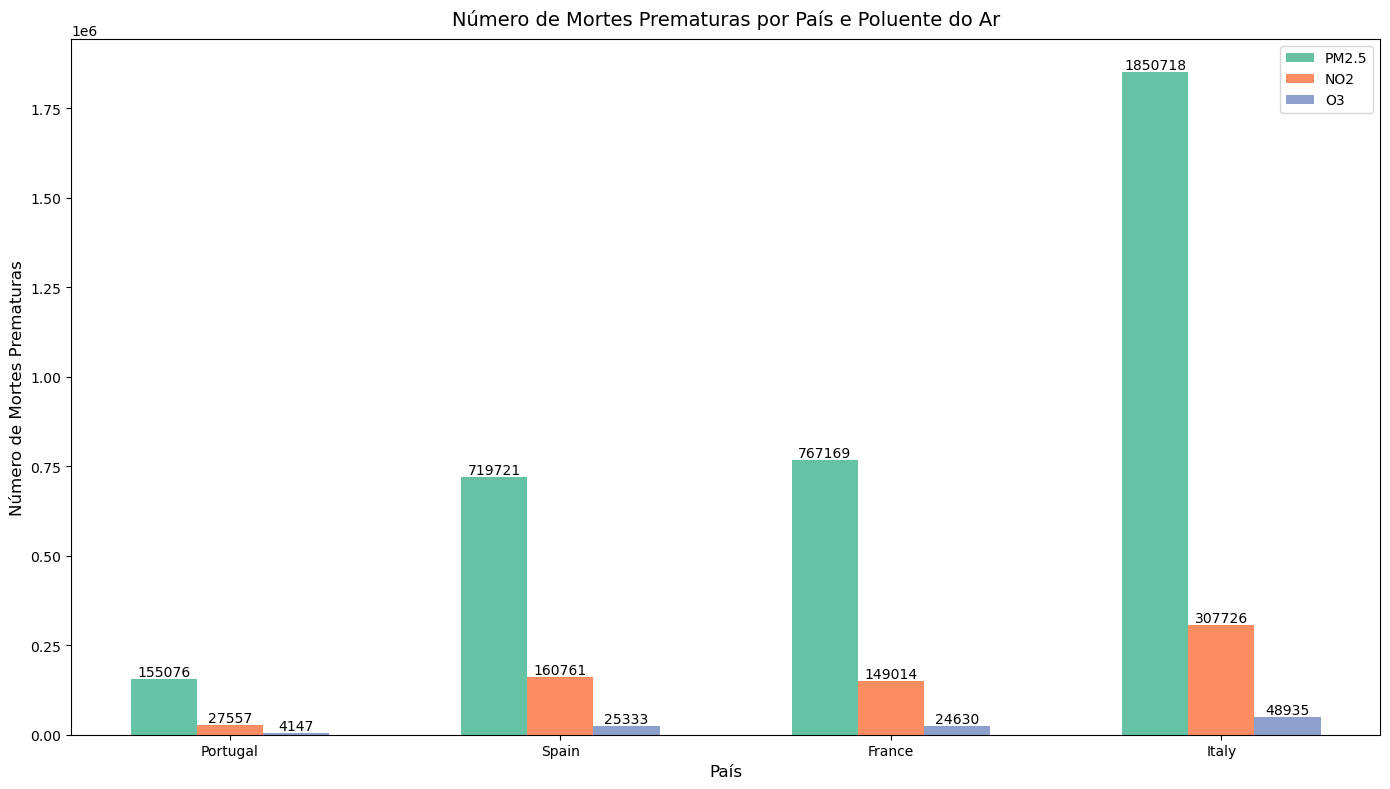

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Lendo o arquivo CSV
df = pd.read_csv(
    '../AIRPOL_data.csv',           # Nome do arquivo
    delimiter=';',              # Separador do CSV
    header=0,                    # Usa a linha 9 (índice 8) como cabeçalho
    usecols=[0,1,2,3,4,5,6,7],  # Colunas a serem lidas
)

# Convertendo a coluna 'Value' para numérico
df['Value'] = pd.to_numeric(df['Value'].str.replace(',', '.'), errors='coerce')

# Filtrando os dados para os países desejados
countries = ['Portugal', 'Spain', 'France', 'Italy']
filtered_data = df[df['Country'].isin(countries)]

# Criando um gráfico agrupado para cada poluente do ar
pollutants = filtered_data['Air_Pollutant'].unique()
colors = sns.color_palette("Set2", len(pollutants))
width = 0.2  # Largura das barras

fig, ax = plt.subplots(figsize=(14, 8))

# Definindo a posição das barras
x = np.arange(len(countries))

for i, pollutant in enumerate(pollutants):
    pollutant_data = []
    for country in countries:
        country_data = filtered_data[(filtered_data['Country'] == country) & (filtered_data['Air_Pollutant'] == pollutant)]
        pollutant_data.append(country_data['Value'].dropna().sum())
    
    bars = ax.bar(x + i * width, pollutant_data, width, label=pollutant, color=colors[i])

    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, height,
            f'{int(height)}', ha='center', va='bottom'
        )


# Personalizando o gráfico
ax.set_title('Número de Mortes Prematuras por País e Poluente do Ar', fontsize=14, pad=10)
ax.set_xlabel('País', fontsize=12)
ax.set_ylabel('Número de Mortes Prematuras', fontsize=12)
ax.set_xticks(x + width * (len(pollutants) - 1) / 2)
ax.set_xticklabels(countries)
ax.legend()

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()